In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading datset
df = pd.read_csv('Bank_Customer_Churn.csv')

In [4]:
#Preview
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
#Check datatypes
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
#Drop unnecessary columns
df.drop(['RowNumber','Surname'], axis = 1, inplace = True)

In [8]:
#Proper format
df['Card Type'] = df['Card Type'].astype(str).str.title()

In [9]:
#Changing data types
num_columns = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
for col in num_columns: 
    df[col] = df[col].map({1:'Yes', 0:'No'})

In [10]:
#Check for missing values
df.isnull().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [11]:
#Display unique values
df.nunique()

CustomerId            10000
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [12]:
#Remove duplicates
df = df.drop_duplicates()

In [13]:
#Grouping Ages
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 100],labels = ["<30", "30s", "40s", "50s", "60+"], right = False)

In [14]:
#Adding column
df['BalancebySalary'] = df['Balance'] / (df['EstimatedSalary'] + 1)

In [15]:
#Calculate overall churn rate
churn_rate = (df['Exited'] == 'Yes').mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 20.38%


In [16]:
#Churn rate by gender
churn_gender = df.groupby('Gender')['Exited'].apply(lambda x:(x == 'Yes').mean() * 100)
print(f"Churn by Gender: {churn_gender}")

Churn by Gender: Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


In [17]:
#Churn rate by geography
churn_country = df.groupby('Geography')['Exited'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"Churn by Country: {churn_country}")

Churn by Country: Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


# Visualization

In [18]:

#Set visual style
custom_palette = ['#c6e4cb', '#91c8ac', '#64a697', '#447e85', '#2e526b', '#1b263d']
sns.set_palette(custom_palette)
sns.set_style("whitegrid")

In [19]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['axes.titlesize'] = 18      
plt.rcParams['axes.labelsize'] = 12 

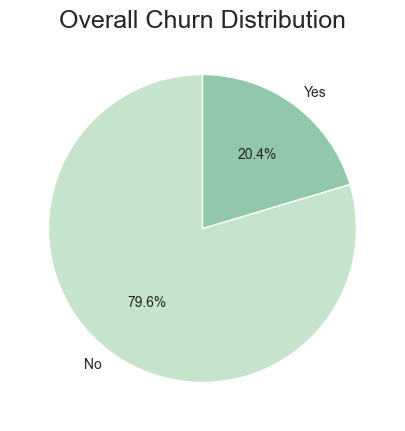

In [20]:
#Overall churn distribution
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts,labels=churn_counts.index,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor': 'white'})
plt.title('Overall Churn Distribution')
plt.show()

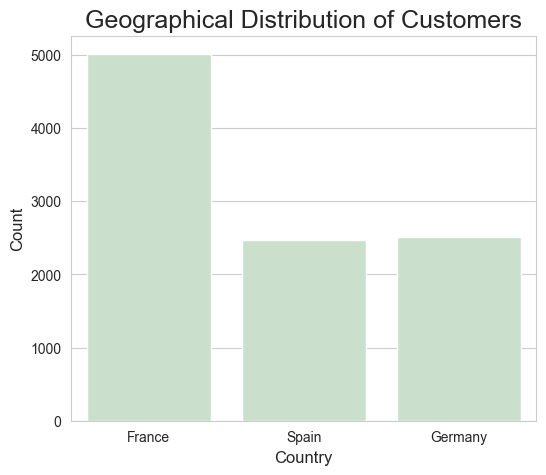

In [21]:
#Geographical Distribution
sns.countplot(data=df, x='Geography')
plt.title('Geographical Distribution of Customers')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

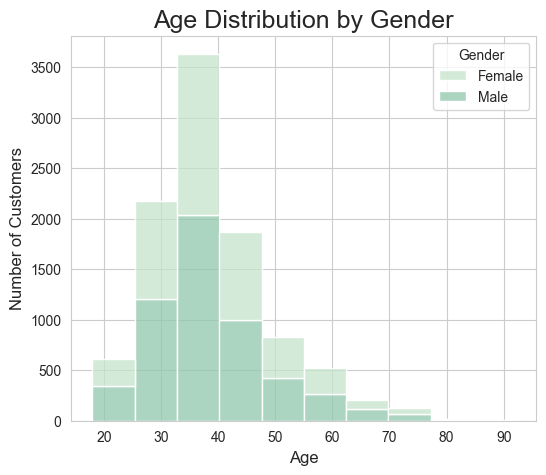

In [22]:
#Age distribution by Gender
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', kde=False, bins=10)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


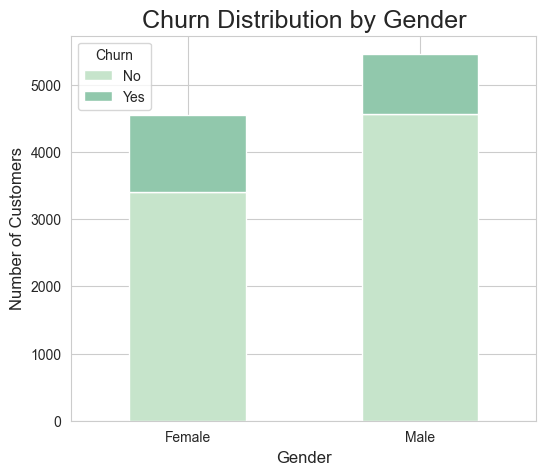

In [207]:
#Churn vs gender
churn_gender = df.groupby(['Gender', 'Exited']).size().unstack()

churn_gender.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks( rotation = 0)
plt.show()

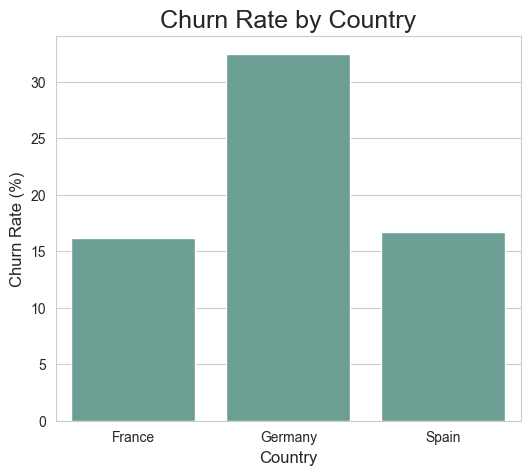

In [198]:
#Churn rate by country
sns.barplot(x= churn_country.index, y = churn_country.values, color = '#64a697')
plt.title('Churn Rate by Country')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Country')
plt.show()

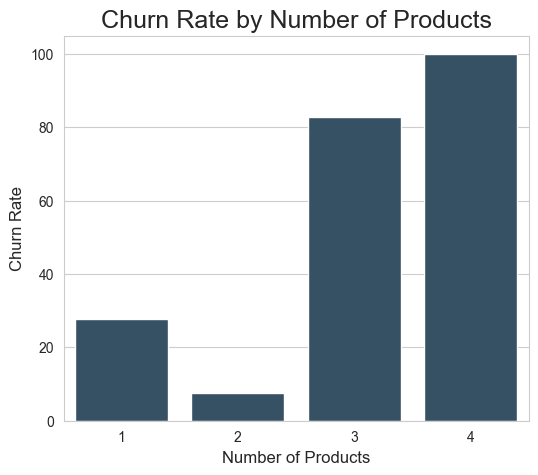

In [208]:
#Products vs churn
churn_products = df.groupby('NumOfProducts')['Exited'].apply(lambda x: (x == 'Yes').mean() * 100)

sns.barplot(x=churn_products.index, y=churn_products.values, color= '#2e526b')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()

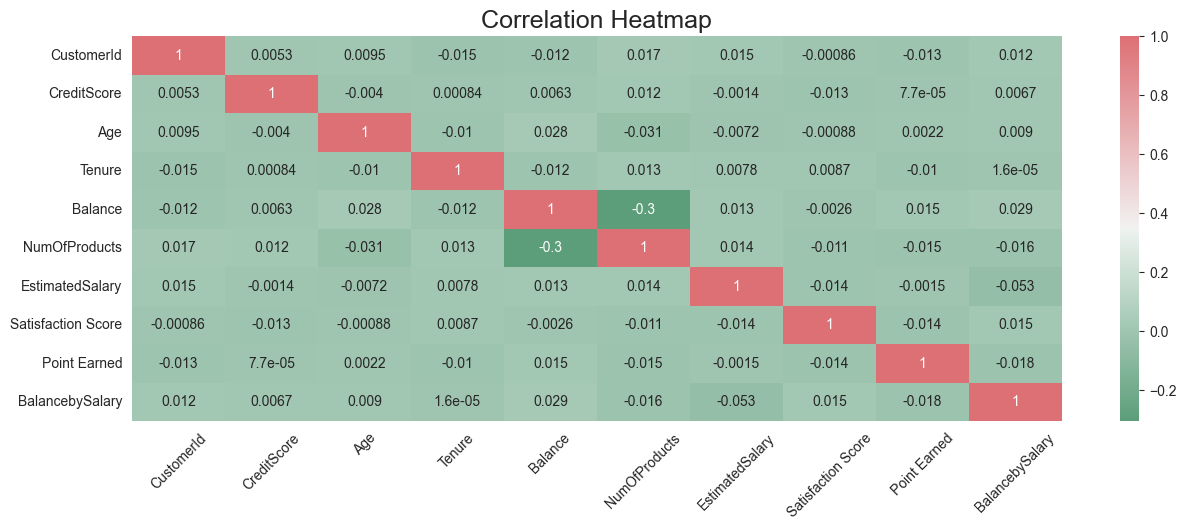

In [26]:
#Correlation heatmap
plt.figure(figsize= (15,5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap=sns.diverging_palette(145, 10, s=60, l=60, as_cmap=True), annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.show()


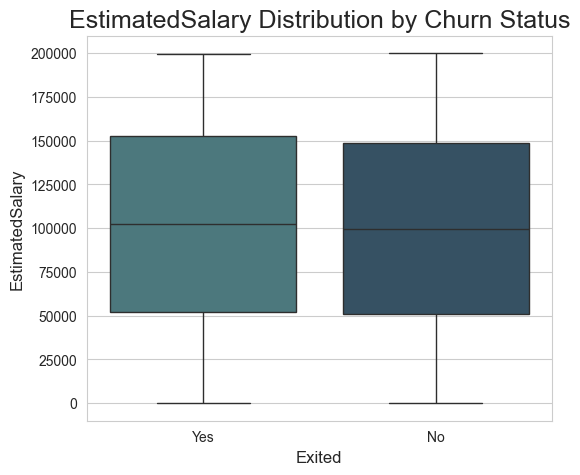

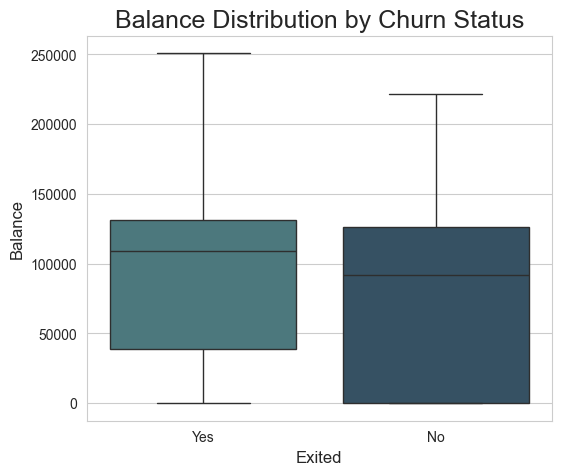

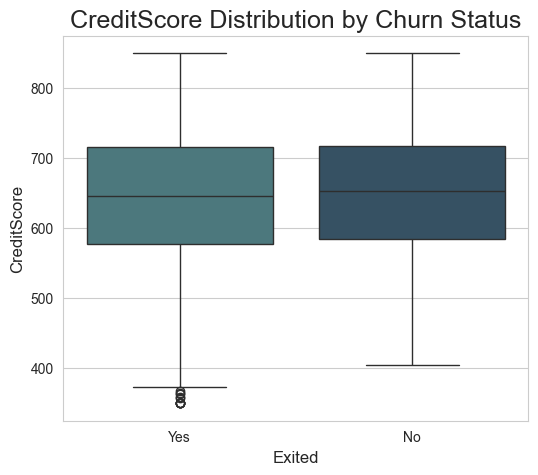

In [27]:
#Saray, Balance, Creditscore by Churn
cols = ['EstimatedSalary', 'Balance', 'CreditScore']

for col in cols:
    sns.boxplot( x='Exited', y=col,data=df,hue='Exited',palette=['#447e85', '#2e526b'])
    plt.title(f'{col} Distribution by Churn Status')
    plt.xlabel('Exited')
    plt.ylabel(col)
    plt.show()

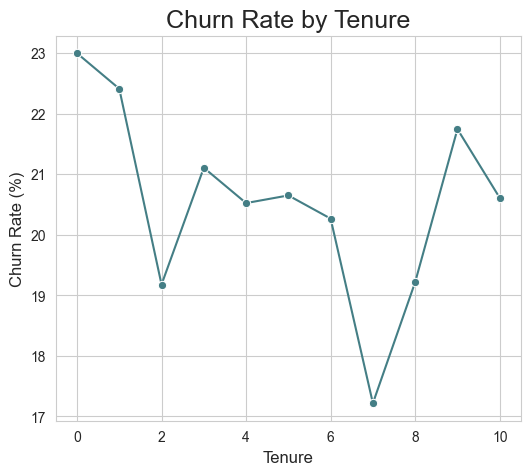

In [202]:
#Tenure vs churn
churn_tenure = df.groupby('Tenure')['Exited'].apply(lambda x: (x == 'Yes').mean() * 100)

sns.lineplot(x=churn_tenure.index, y=churn_tenure.values, marker='o',color= '#447e85')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate (%)')
plt.show()

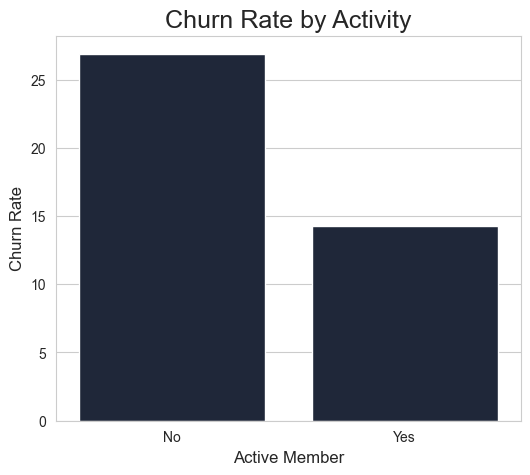

In [203]:
#Churn by activity
churn_active = df.groupby('IsActiveMember')['Exited'].apply(lambda x: (x == 'Yes').mean() * 100)

sns.barplot(x=churn_active.index.astype(str), y=churn_active.values, color='#1b263d')
plt.title('Churn Rate by Activity')
plt.xlabel('Active Member')
plt.ylabel('Churn Rate')
plt.show()

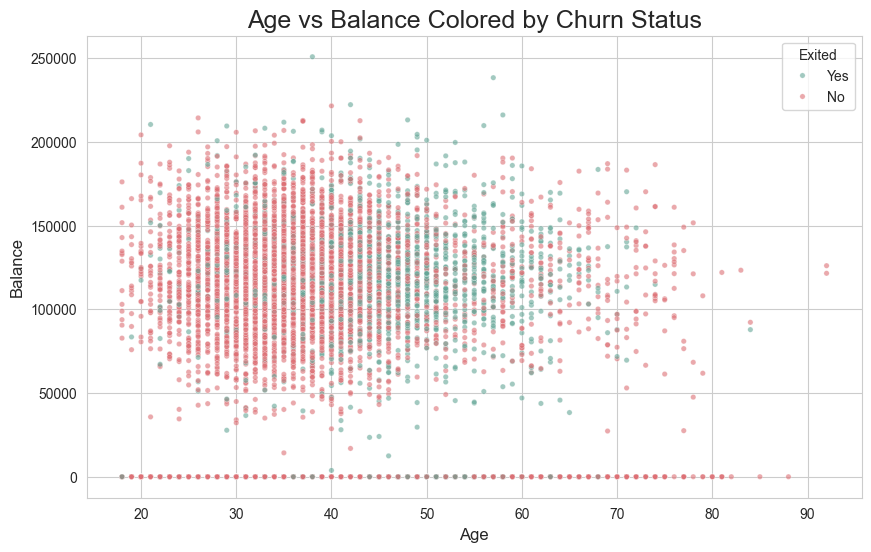

In [204]:
#Age vs Balnace by churn
plt.figure(figsize = (10,6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, palette={'No':'#dd7075', 'Yes':'#64a697'}, alpha=0.6, s=15)
plt.title('Age vs Balance Colored by Churn Status')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

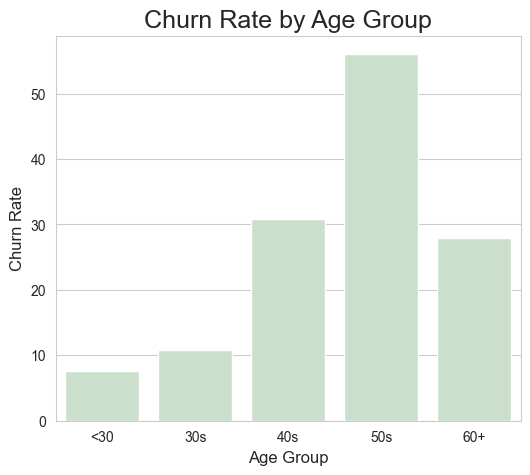

In [205]:
#Churnrate by Agegroup
churn_age = df.groupby('AgeGroup', observed=True)['Exited'].apply(lambda x: (x == 'Yes').mean() * 100)
sns.barplot(x=churn_age.index, y=churn_age.values)
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.show()